In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [2]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)
display(X)

print('--- full ---')
poly = PolynomialFeatures(2)
X_transform = poly.fit_transform(X)
display(X_transform)

print('--- bias off ---')
poly = PolynomialFeatures(include_bias=False)
X_transform = poly.fit_transform(X)
display(X_transform)

print('--- original off ---')
poly = PolynomialFeatures(interaction_only=True)
X_transform = poly.fit_transform(X)
display(X_transform)

print('--- bias, original off ---')
poly = PolynomialFeatures(include_bias=False, interaction_only=True)
X_transform = poly.fit_transform(X)
display(X_transform)

array([[0, 1],
       [2, 3],
       [4, 5]])

--- full ---


array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

--- bias off ---


array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.]])

--- original off ---


array([[ 1.,  0.,  1.,  0.],
       [ 1.,  2.,  3.,  6.],
       [ 1.,  4.,  5., 20.]])

--- bias, original off ---


array([[ 0.,  1.,  0.],
       [ 2.,  3.,  6.],
       [ 4.,  5., 20.]])

## Полиномиальный фичинг

In [3]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))*1) / 2
    return x.reshape(-1, 1), y

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

X, y = make_wave(n_samples=120)

from sklearn.preprocessing import PolynomialFeatures

# включая полиномы степени до x ** 10:
# по умолчанию "include_bias=True" есть свободный член в многочленне с данными
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print(X_poly.shape)

(120, 10)


In [4]:
np.linspace(-3, 3, 1000, endpoint=False)[:100]

array([-3.   , -2.994, -2.988, -2.982, -2.976, -2.97 , -2.964, -2.958,
       -2.952, -2.946, -2.94 , -2.934, -2.928, -2.922, -2.916, -2.91 ,
       -2.904, -2.898, -2.892, -2.886, -2.88 , -2.874, -2.868, -2.862,
       -2.856, -2.85 , -2.844, -2.838, -2.832, -2.826, -2.82 , -2.814,
       -2.808, -2.802, -2.796, -2.79 , -2.784, -2.778, -2.772, -2.766,
       -2.76 , -2.754, -2.748, -2.742, -2.736, -2.73 , -2.724, -2.718,
       -2.712, -2.706, -2.7  , -2.694, -2.688, -2.682, -2.676, -2.67 ,
       -2.664, -2.658, -2.652, -2.646, -2.64 , -2.634, -2.628, -2.622,
       -2.616, -2.61 , -2.604, -2.598, -2.592, -2.586, -2.58 , -2.574,
       -2.568, -2.562, -2.556, -2.55 , -2.544, -2.538, -2.532, -2.526,
       -2.52 , -2.514, -2.508, -2.502, -2.496, -2.49 , -2.484, -2.478,
       -2.472, -2.466, -2.46 , -2.454, -2.448, -2.442, -2.436, -2.43 ,
       -2.424, -2.418, -2.412, -2.406])

In [5]:
np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)[:10]

array([[-3.   ],
       [-2.994],
       [-2.988],
       [-2.982],
       [-2.976],
       [-2.97 ],
       [-2.964],
       [-2.958],
       [-2.952],
       [-2.946]])

In [6]:
print("Entries of X:\n{}".format(X[:5]))
print("Entries of X_poly:\n{}".format(X_poly[:5]))

Entries of X:
[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]
Entries of X_poly:
[[-7.52759287e-01  5.66646544e-01 -4.26548448e-01  3.21088306e-01
  -2.41702204e-01  1.81943579e-01 -1.36959719e-01  1.03097700e-01
  -7.76077513e-02  5.84199555e-02]
 [ 2.70428584e+00  7.31316190e+00  1.97768801e+01  5.34823369e+01
   1.44631526e+02  3.91124988e+02  1.05771377e+03  2.86036036e+03
   7.73523202e+03  2.09182784e+04]
 [ 1.39196365e+00  1.93756281e+00  2.69701700e+00  3.75414962e+00
   5.22563982e+00  7.27390068e+00  1.01250053e+01  1.40936394e+01
   1.96178338e+01  2.73073115e+01]
 [ 5.91950905e-01  3.50405874e-01  2.07423074e-01  1.22784277e-01
   7.26822637e-02  4.30243318e-02  2.54682921e-02  1.50759786e-02
   8.92423917e-03  5.28271146e-03]
 [-2.06388816e+00  4.25963433e+00 -8.79140884e+00  1.81444846e+01
  -3.74481869e+01  7.72888694e+01 -1.59515582e+02  3.29222321e+02
  -6.79478050e+02  1.40236670e+03]]


In [7]:
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out()))

Polynomial feature names:
['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


(120, 9)


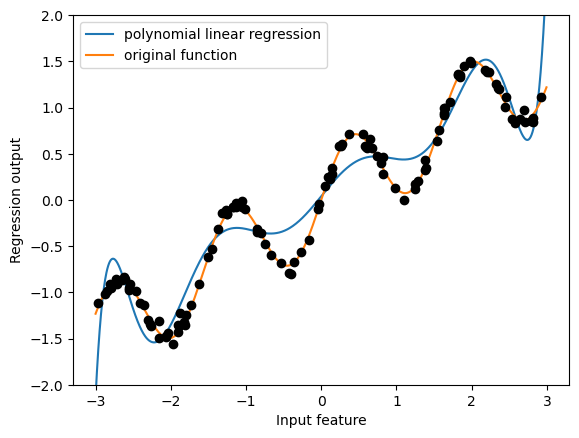

In [8]:
def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + 0.1*rnd.normal(size=len(x))*1) / 2
    return x.reshape(-1, 1), y

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

X, y = make_wave(n_samples=120)

from sklearn.preprocessing import PolynomialFeatures

# включая полиномы степени до x ** 10:
# по умолчанию "include_bias=True" есть свободный член в многочленне с данными
poly = PolynomialFeatures(degree=9, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print(X_poly.shape)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)

plt.plot(line, reg.predict(line_poly), label='polynomial linear regression')
plt.plot(line, (np.sin(4*line)+line)/2, label='original function')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylim(-2,2)
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best");


In [9]:
y.shape

(120,)